# Challenge

- Transformr cell type into dummy variables. Use `pd.get_dummies` or `drop` the variable.
- Cox Proportional Hazard Regression
- Plot CPH results

# Imports

In [ ]:
#!pip install lifelines

In [3]:
import pandas as pd
from lifelines import CoxPHFitter

# Load Dataset

Randomised trial of two treatment regimens for lung cancer. This is a standard survival analysis data set. Veteran lung cncer A/B test

In [4]:
dataset = pd.read_csv("veteran.csv")
dataset.head()                                  

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


transform cell type

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,trt,time,status,karno,diagtime,age,prior,celltype_large,celltype_smallcell,celltype_squamous
0,1,72,1,60,7,69,0,0,0,1
1,1,411,1,70,5,64,10,0,0,1
2,1,228,1,60,3,38,0,0,0,1
3,1,126,1,60,9,63,10,0,0,1
4,1,118,1,70,11,65,10,0,0,1


# Cox Proportional Hazard(CPH)

In [ ]:
model = CoxPHFitter()
model.fit(dataset, "time",
          event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -474.40
         time fit was run = 2021-03-06 08:44:27 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
trt                  0.29       1.34       0.21            -0.11             0.70                 0.89                 2.02
karno               -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
diagtime             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
age                 -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
prior                0.01       1.01       0.02            -0.04             0.05                 0.96                 1.05
celltype_large      -0.79       0.45       0.30            -1.39            -0.20                 0.25                 0.82
celltype_smallcell  -0.33       0.72       0.28            -0.88             0.21                 0.42                 1.23
celltype_squamous   -1.20       0.30       0.30            -1.79            -0.61                 0.17                 0.55

                       z      p   -log2(p)
covariate                                 
trt                 1.42   0.16       2.68
karno              -5.96 <0.005      28.55
diagtime            0.01   0.99       0.01
age                -0.94   0.35       1.52
prior               0.31   0.76       0.40
celltype_large     -2.62   0.01       6.85
celltype_smallcell -1.21   0.23       2.15
celltype_squamous  -3.97 <0.005      13.79
---
Concordance = 0.74
Partial AIC = 964.79
log-likelihood ratio test = 62.10 on 8 df
-log2(p) of ll-ratio test = 32.37

- `karno`
- `celltype_large`
- `celltype_squamous`

They are statisitically significant inflencing in likelihood in survival curve in lung cancer. So

- `karno`: increase likelihood
- `celltype_large`: decrease likelihood
- `celltype_squamouns`: decrease likelihood

# Visualize

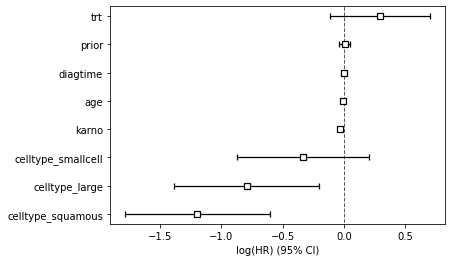

In [ ]:
model.plot()

And then that we see the cell types are statiscally signigicant.